### Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cloning Yolov5 from Ultralytics Github Library

In [3]:
# !git clone https://github.com/ultralytics/yolov5
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


### Installing and Setting Up Dependencies

In [4]:
%pip install -qr requirements.txt # installs all dependencies listed in the requirements.txt file
%pip install -q roboflow # installs the roboflow library used for managing the dataset

# -- imports PyTorch library for building and running the deep learning model

import torch

# -- imports the operating system library used for handling file paths and interacting with the operating system

import os

# -- imports Image and clear_output functions from IPython for displaying images and clearing outputs in the notebook
from IPython.display import Image, clear_output

print("Setup Complete") # message to confirm successful setup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 94.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
gradio 5.49.1 requires pillow<12.0,>=8.0, but you have pillow 12.0.0 which is incompatible.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.10.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
Setup Complete


### Accessing Roboflow and Downloading the Dataset into the Current Environment

In [5]:
from roboflow import Roboflow # imports the installed roboflow library
rf = Roboflow(api_key="INSERT YOUR API KEY", model_format = "yolov5", notebook="ultralytics") # creates an instance of roboflow to access the dataset

In [6]:
# set up environment

os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [7]:
# rf = Roboflow(api_key="x0WvO7ZDLz4mx3oeqbRF")
project = rf.workspace("advanced-engineering-and-innovation-group-aeirg").project("ptdf_project_updated") # defines the name of the roboflow workspace alongside the specific project title
version = project.version(1) # defines the version of the dataset to use
dataset = version.download("yolov5") # downloads the dataset



loading Roboflow workspace...
loading Roboflow project...


### Training the Model

In [ ]:
# !python train.py --img 640 --batch 16 --epoch 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache --save-period 1
!python train.py --resume /content/drive/MyDrive/yolov5/runs/train/exp/weights/last.pt

2024-07-02 12:51:13.475668: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 12:51:13.475724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 12:51:13.602692: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/yolov5/runs/train/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_we

**Resumes Training**

In [ ]:
!python train.py --img 640 --batch 16 --epoch 100 --data {dataset.location}/data.yaml --weights /content/drive/MyDrive/yolov5/weights/yolov5s.pt --cache
# !python train.py --resume /content/drive/MyDrive/yolov5/runs/train/exp/weights/last.pt

2024-07-03 05:31:29.580706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 05:31:29.580773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 05:31:29.716540: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/yolov5/runs/train/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_we

### Launches Tensorbaord to Visualize Training Logs

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

Launching TensorBoard...

### Downloads the Trained Model Weights File

In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Displays Training Results

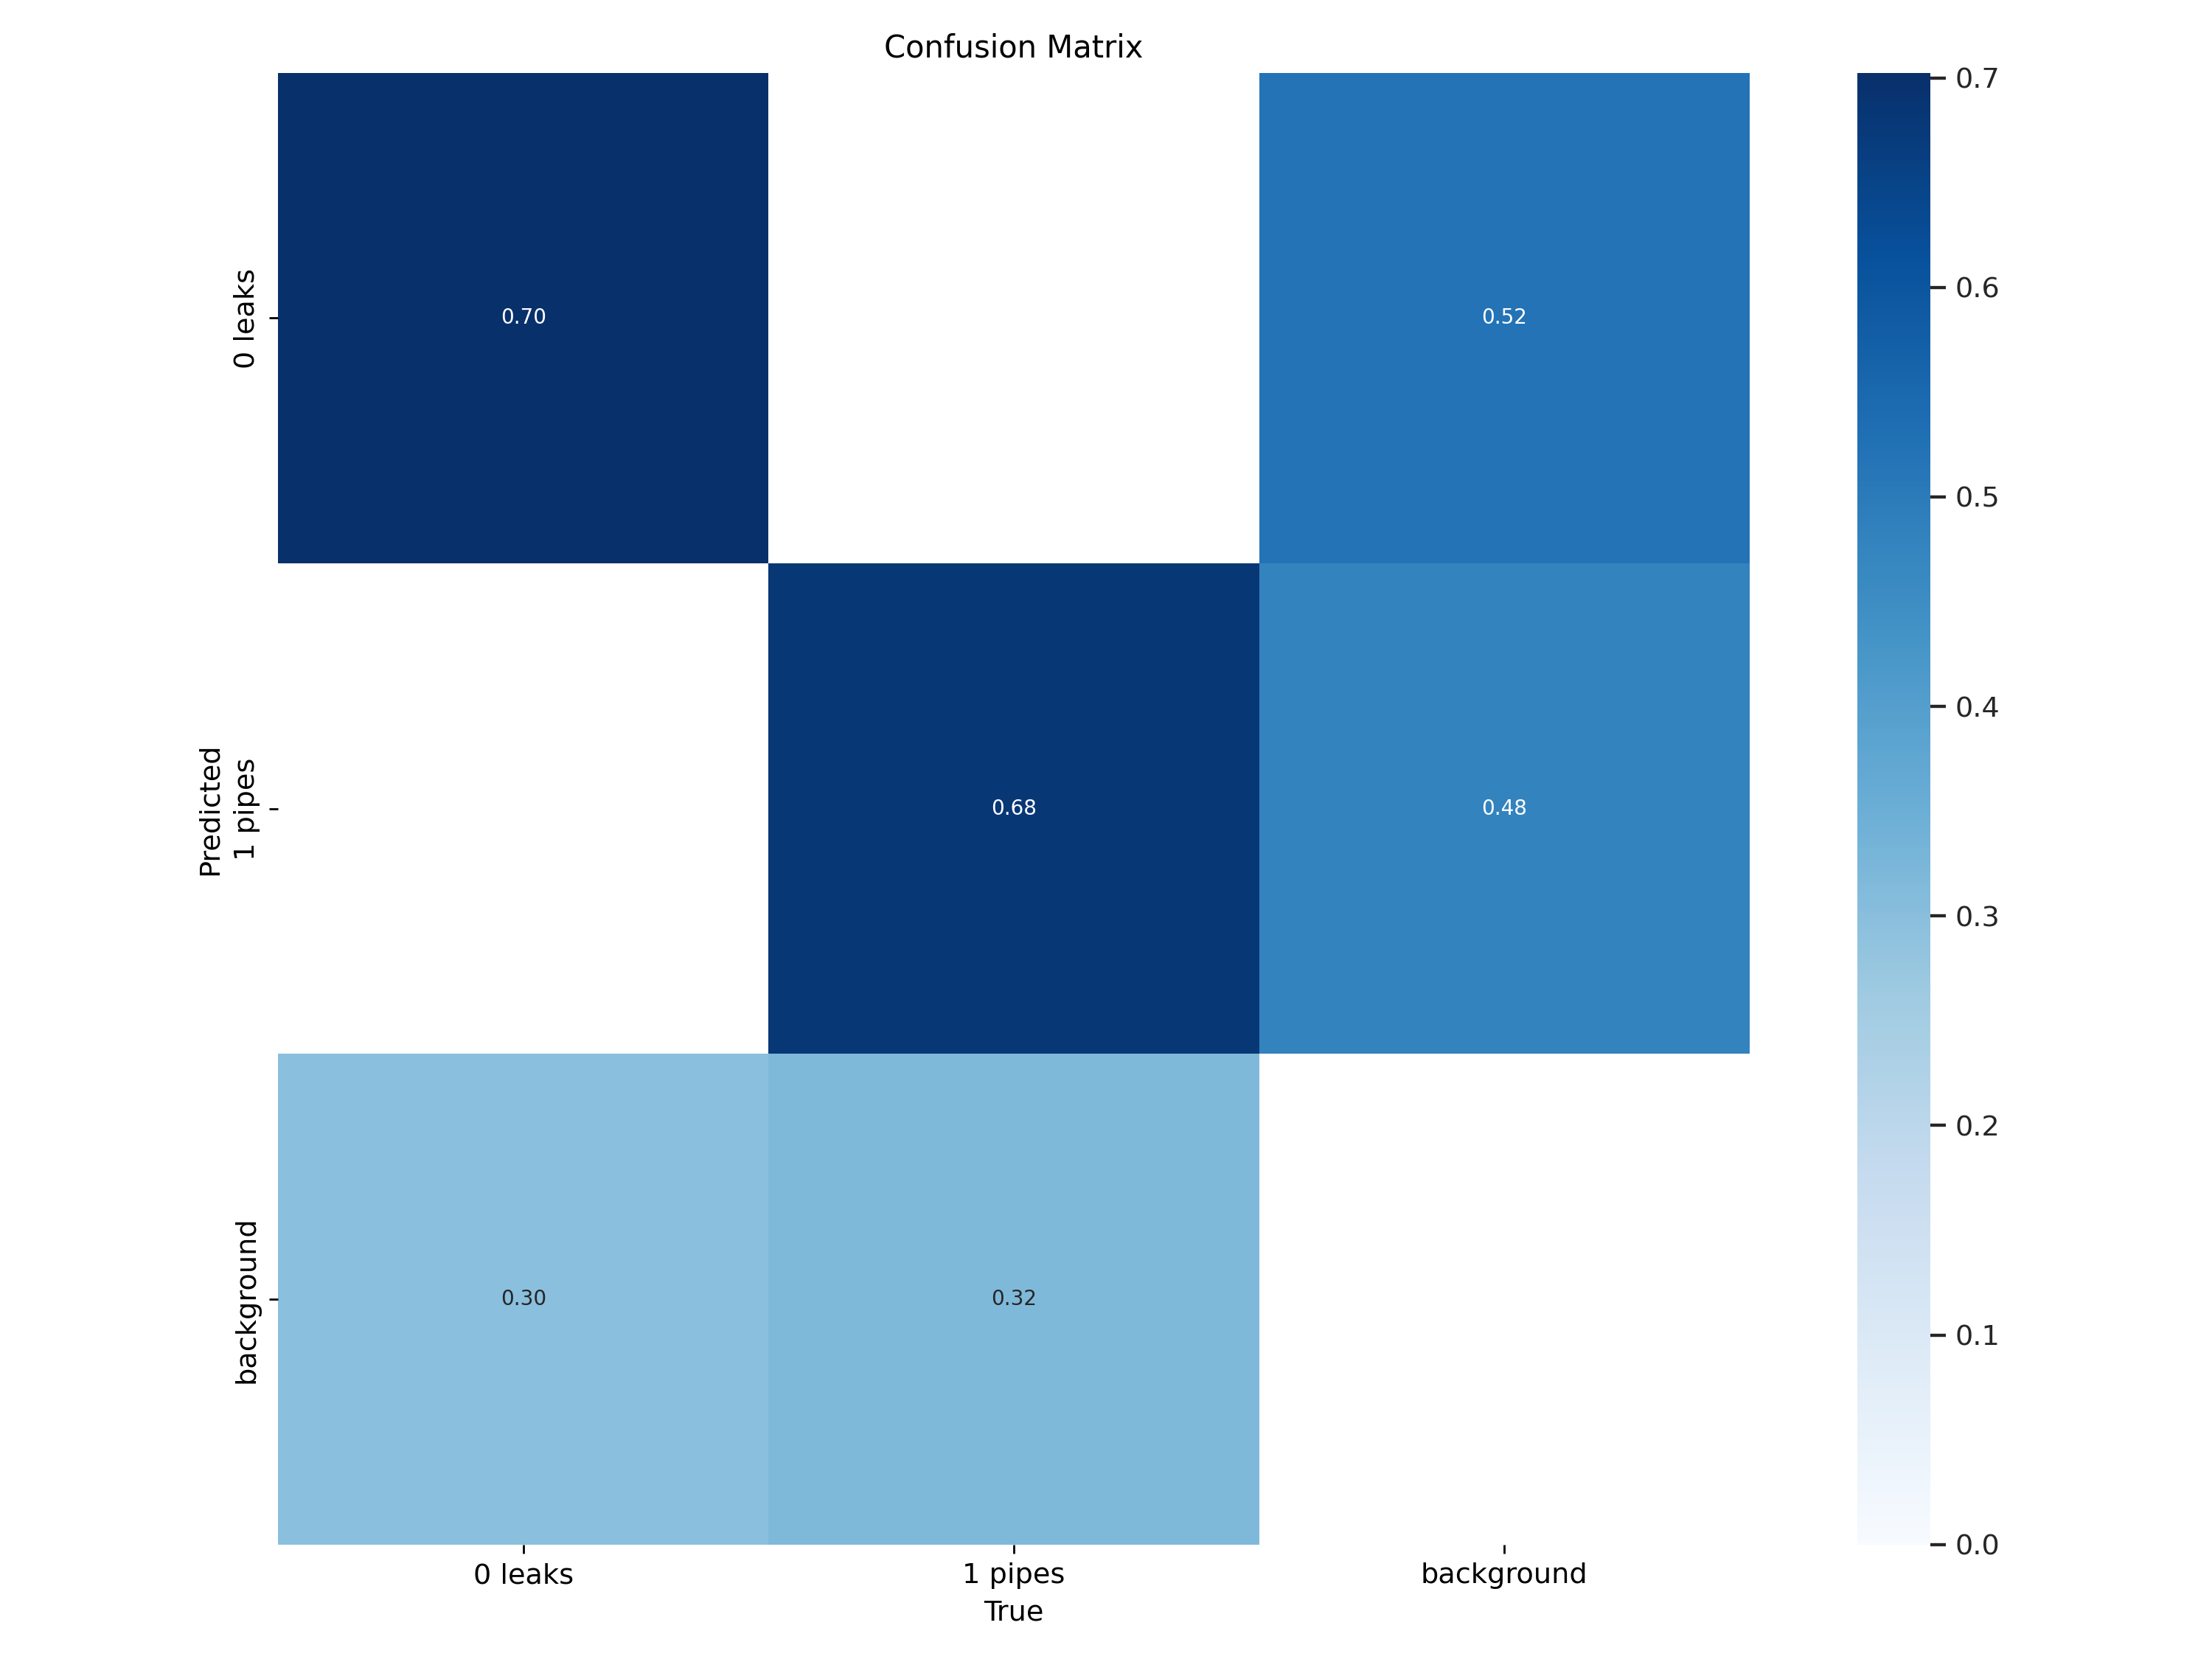

In [ ]:
from IPython.display import display, Image
Image(filename='confusion_matrix.png', width=600) # loads the confusion matrix image results

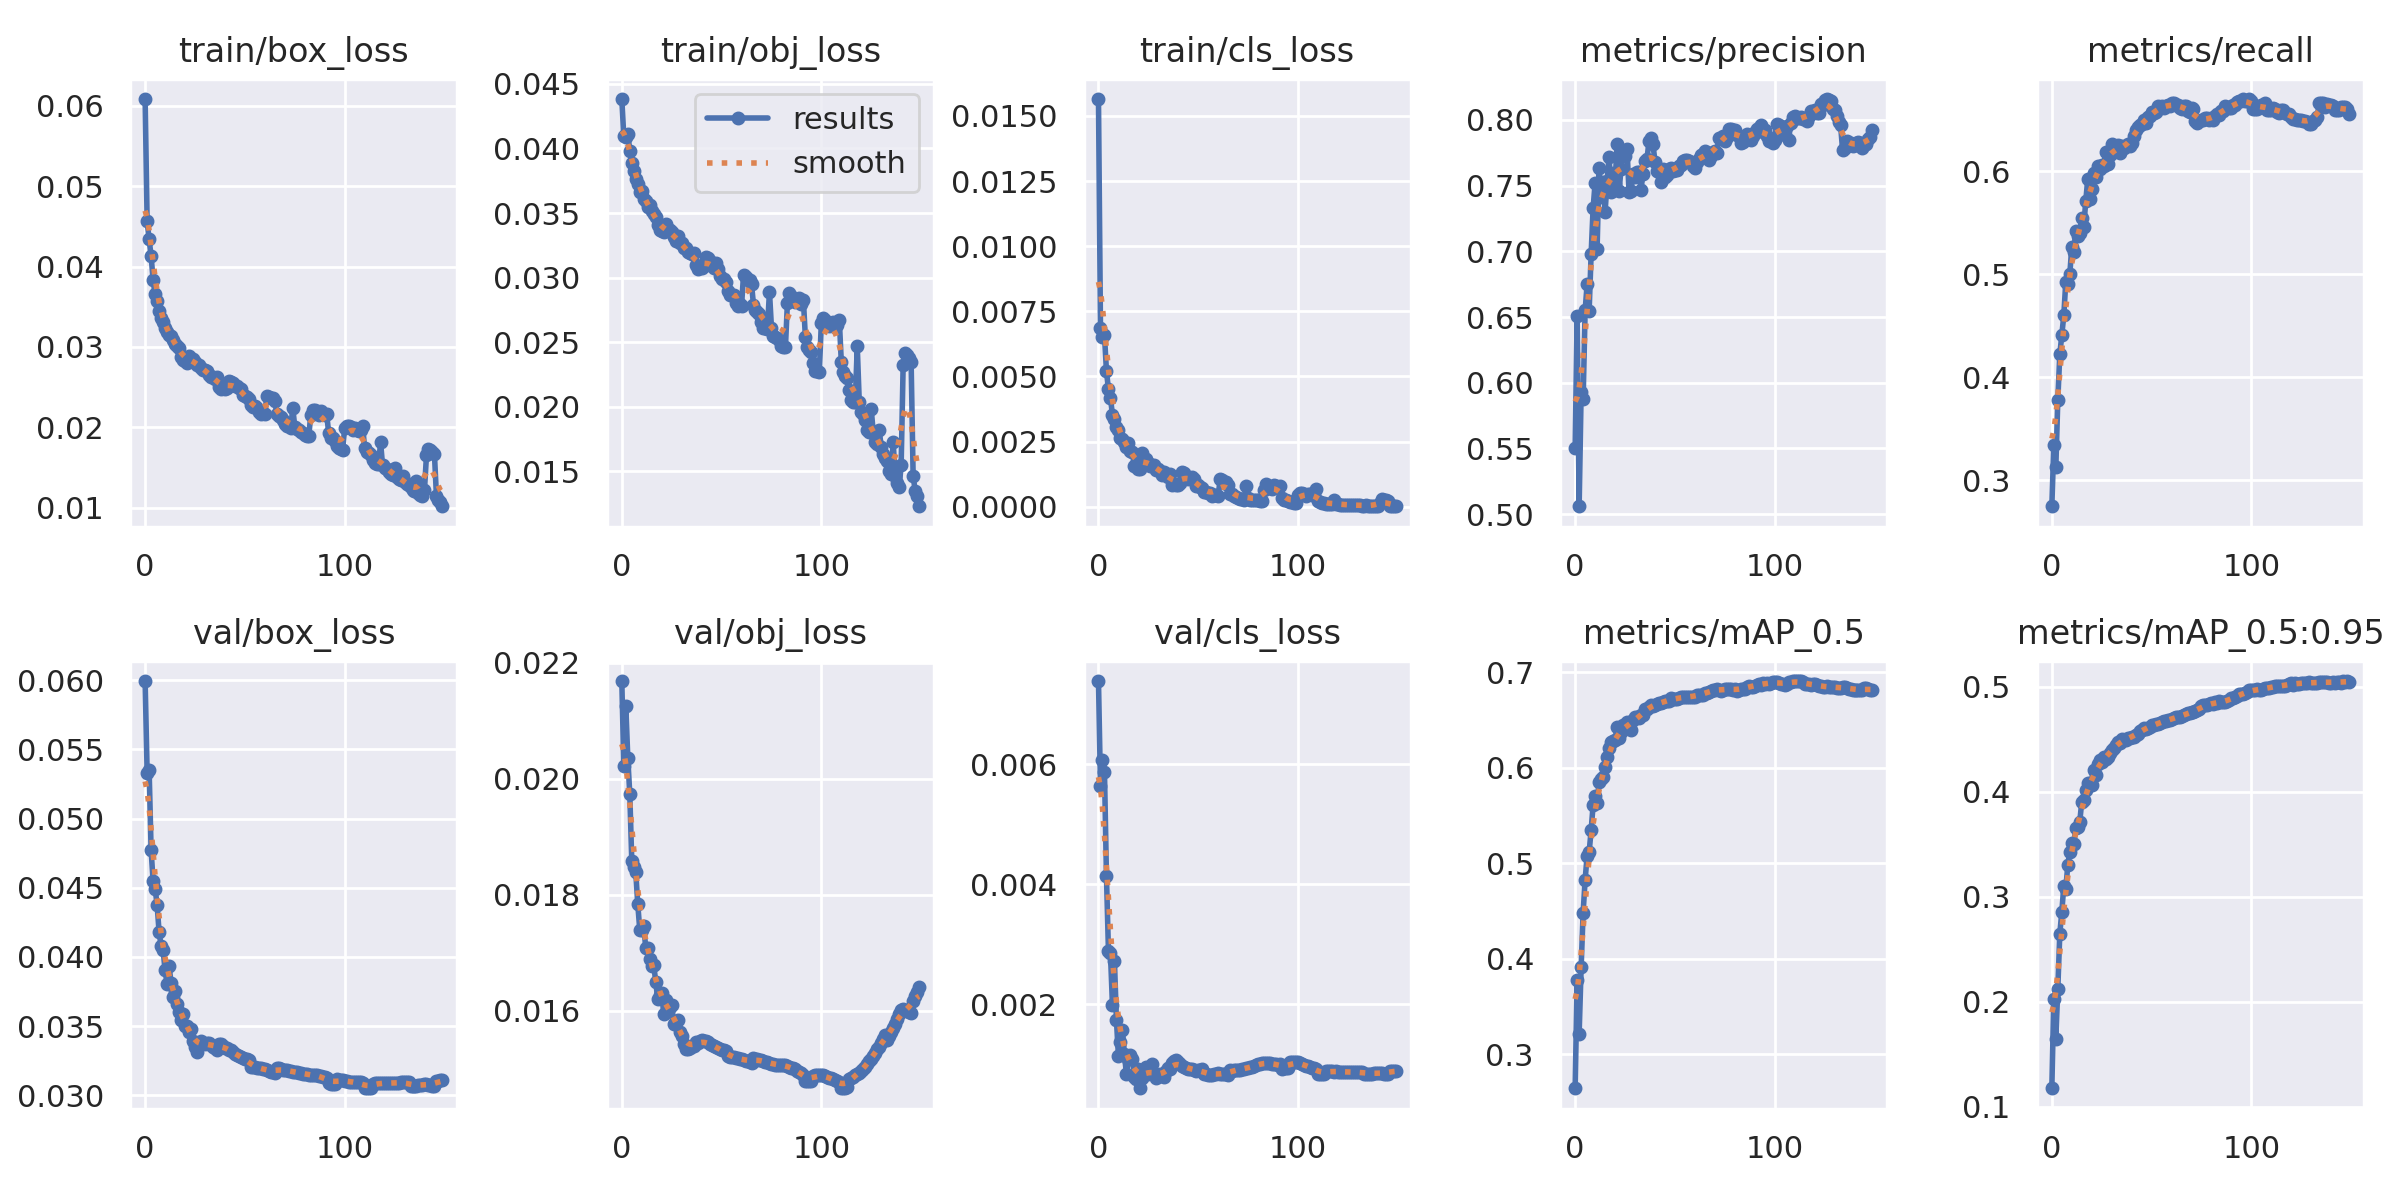

In [ ]:
Image(filename='results.png', width=600) # laods the evaluation metrics image results

### Testing the Model on the Validation Set

In [8]:
!python val.py --weights /content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt --data /content/datasets/PTDF_Project_Updated-1/data.yaml --img 640 --task val

/content/drive/MyDrive/yolov5/utils/general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
val: data=/content/datasets/PTDF_Project_Updated-1/data.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.12.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/yolov5/models/experimental.py:98: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses t

### Performing Inferencing/Predictions on Images

In [11]:
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt --source /content/datasets/PTDF_Project_Updated-1/test/images --conf 0.5 --save-txt --save-conf --name test_results

/content/drive/MyDrive/yolov5/utils/general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt'], source=/content/datasets/PTDF_Project_Updated-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=test_results, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.12.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/yolo

### Performing Inferencing/Predictions on Videos

In [7]:
!python yolov5/detect.py --weights yolov5/model_weights.pt --source yolov5/test2.mp4 --conf 0.5 --img 640 --view-img

requirements: Ultralytics requirement ['urllib3>=2.5.0 ; python_version > "3.8"'] not found, attempting AutoUpdate...
WARNING Retry 1/2 failed: Command 'pip install --no-cache-dir "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.
WARNING Retry 2/2 failed: Command 'pip install --no-cache-dir "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.
WARNING requirements:  Command 'pip install --no-cache-dir "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.


detect: weights=['yolov5/model_weights.pt'], source=yolov5/test2.mp4, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=True, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\pip\_vendor\packaging\markers.py", line 278, in __init__
    self._markers = _coerce_parse_result(MARKER.parseString(marker))
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\pip\_vendor\pyparsing\util.py", line 256, in _inner
    return fn(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\ana

In [12]:
print("© Rizama Victor")

© Rizama Victor
